<!--HEADER-->
[*Notas sobre modelagem da epidemia de Covid-19*](https://github.com/rmsrosa/modcovid19) / [*IM-UFRJ*](https://www.im.ufrj.br).

<!--BADGES-->
<a href="../slides/14.00.Aula-Modelos_individuais_convergencia_redes_completas.slides.html" target="_blank"><img align="left" src="https://img.shields.io/badge/local-slides-darkgreen" alt="localslides" title="Local Slides"></a>
&nbsp;

<!--NAVIGATOR-->
[<- Modelos individuais - comparação entre as implementações matricial e vetorial](13.00.Aula-Modelos_individuais_comparacao_matricial_vetorial.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) 

---


# Modelos individuais - convergência em redes completas

Nesta seção, vamos examinar a convergência do modelo de indivíduos para o compartimental quando o passo temporal vai a zero.

**Importando bibliotecas e definindo funções a serem usadas abaixo**

In [1]:
import datetime # date and time tools

import os, sys

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import io, base64
from IPython.display import Image, HTML

In [2]:
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))
import episiming

In [3]:
dt_string = datetime.datetime.now().strftime("%d/%b/%Y")
print(f"Atualização mais recente do kernel: {dt_string}")

Atualização mais recente do kernel: 15/May/2020


In [4]:
sns.set_style("darkgrid")

In [5]:
def exibe_comparacao(X_comp, X_comp_mat, X_sir, num_infectados_0, beta, gamma, dt, num_sim):
    """
    Exibe gráfico comparando as simulações via método SIR compartimental e duas 
    implementações do método de indivíduos, versão matricial e vetorial.
    """
    plt.figure(figsize=(12,6))

    # exibe os gráficos
    plt.plot(X_comp.tempos, X_comp.I_medio, label='Indivíduos - vetorial: I médio')
    plt.plot(X_comp_mat.tempos, X_comp_mat.I_medio, label='Indivíduos - matricial: I médio')
    plt.plot(X_sir.tempos, X_sir.I, label='SIR compartimental: I')

    # informações para o gráfico
    plt.xlabel('dias', fontsize=14)
    plt.ylabel('número de indivíduos', fontsize=14)
    plt.title('Evolução do número de infectados'
              + f'\nnum_infectados_0 = {num_infectados_0}, beta = {beta}, gamma = {gamma}, '
              + f'dt = {dt}, num_sim = {num_sim}',
              fontsize=16)
    plt.legend(loc='best', fontsize=12)
    plt.show()

In [6]:
def calcula_convergencia(num_sim, t_0, dt_0, T_max, J):

    dt_lista = [dt_0/2**j for j in range(J)]
    
    print(f'{len(dt_lista)} simulações com dt decrescente:\nValores de dt: {dt_lista}')

    l_2_comp = []
    l_2_comp_mat = []
    l_2_dif = []
    l_infty_comp = []
    l_infty_comp_mat = []
    l_infty_dif = []

    for dt in dt_lista:
        num_dt = int(T_max/dt)
        T = t_0 + num_dt*dt
        dados_temporais = [t_0, dt, num_dt]
        tempos = np.linspace(t_0, num_dt*dt, num_dt+1)
        print(f'\nCalculando soluções e diferenças para dt = {dt}...')
        X_comp = rede_completa.evolui(dados_temporais, num_sim)
        X_comp_mat = rede_completa.evolui_matricial(dados_temporais, num_sim)
        X_sir = episiming.compartimentais.evolucao_SIR(pop_sir_0, beta, gamma, tempos)
        l_2_comp_j = dt*np.linalg.norm(X_comp.I_medio-X_sir.I)
        l_2_comp_mat_j = dt*np.linalg.norm(X_comp_mat.I_medio-X_sir.I)
        l_2_dif_j = dt*np.linalg.norm(X_comp.I_medio-X_comp_mat.I_medio)
        l_2_comp.append(l_2_comp_j)
        l_2_comp_mat.append(l_2_comp_mat_j)
        l_2_dif.append(l_2_dif_j)
        l_infty_comp_j = (X_comp.I_medio-X_sir.I).max()
        l_infty_comp_mat_j = (X_comp_mat.I_medio-X_sir.I).max()
        l_infty_dif_j = (X_comp.I_medio-X_comp_mat.I_medio).max()
        l_infty_comp.append(l_infty_comp_j)
        l_infty_comp_mat.append(l_infty_comp_mat_j)
        l_infty_dif.append(l_infty_dif_j)
        
        print(f'Norma L^2 entre X_comp.I_medio e X_sir.I: {l_2_comp_j}')
        print(f'Norma L^2 entre X_comp_mat.I_medio e X_sir.I: {l_2_comp_mat_j}')
        print(f'Norma L^2 entre X_comp.I_medio e X_comp_mat.I_medio: {l_2_dif_j}')
        print(f'Norma L^infty entre X_comp.I_medio e X_sir.I: {l_infty_comp_j}')
        print(f'Norma L^infty entre X_comp_mat.I_medio e X_sir.I: {l_infty_comp_mat_j}')
        print(f'Norma L^infty entre X_comp.I_medio e X_comp_mat.I_medio: {l_infty_dif_j}')
        
    return l_2_comp, l_2_comp_mat, l_infty_comp, l_infty_comp_mat, l_2_dif, l_infty_dif, \
           dt_lista, X_comp, X_comp_mat, X_sir, dt

In [7]:
def exibe_convergencia(dt_lista, num_pop, num_infectados_0, beta, gamma, num_sim,
                       l_comp, l_comp_mat, l_diff, norma, xscale = 'linear'):
    
    plt.figure(figsize=(12,6))

    plt.plot(dt_lista, l_comp, 'o-', color='tab:red', label='vetorial - SIR')
    plt.plot(dt_lista, l_comp_mat, 'o-', color='tab:blue', label='matricial - SIR')
    plt.plot(dt_lista, l_diff, 'o-', color='tab:green', label='vet - mat')

    plt.xscale(xscale)
    plt.xlim([dt_lista[0], dt_lista[-1]])
    plt.legend(loc='best', fontsize=12)

    plt.xlabel('dt', fontsize=14)
    plt.ylabel(f'diferença {norma}', fontsize=14)
    plt.title(f'Diferença em norma {norma} entre os infectados simulados pelo SIR compartimental'
              + '\ne os infectados segundo os individuais vetorial e matricial'
              + f'\nnum_pop = {num_pop}, num_infectados_0 = {num_infectados_0}, beta = {beta}, '
              + f'gamma = {gamma}, num_sim = {num_sim}',
              fontsize = 16)

    plt.show()

## Cenário com rede completa

Para testar as implementações do modelo de indivíduos, vamos considerar um cenário em que a rede é homogêna, tornando a comparação com o SIR compartimental mais direta.

Neste cenário, desconsideramos as interações aleatórias com a comunidade ($\beta_c=0$) e as interações nas residências ($\beta_r=0$). Completamos fazendo a rede social ser completa (cada indivíduo interage com todos os outros indivíduos, com o mesmo peso) e definindo $\beta_s = \beta$.

No que se segue, vamos comparar as duas implementações (matricial e vetorial) com o SIR, em diversas situações.

### Parâmetros do cenário inicial e da epidemia

In [8]:
num_pop = 60
num_infectados_0 = 6
beta = 0.5
gamma = 0.2

pop_sir_0 = [num_pop-num_infectados_0, num_infectados_0, 0]

rede_completa = episiming.cenarios.RedeCompleta(num_pop, num_infectados_0, beta, gamma)

In [9]:
%%time

num_sim = 20
dt_0 = 4 # primeiro passo
J = 8 # número de passos dt
t_0 = 0 # instante initial
T_max = 40 # instante final máximo

l_2_comp_20, l_2_comp_mat, l_infty_comp, l_infty_comp_mat, l_2_dif, l_infty_dif, \
    dt_lista, X_comp, X_comp_mat, X_sir, dt \
    = calcula_convergencia(num_sim, t_0, dt_0, T_max, J)

8 simulações com dt decrescente:
Valores de dt: [4.0, 2.0, 1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125]

Calculando soluções e diferenças para dt = 4.0...
Norma L^2 entre X_comp.I_medio e X_sir.I: 60.443320080451684
Norma L^2 entre X_comp_mat.I_medio e X_sir.I: 59.248366526950136
Norma L^2 entre X_comp.I_medio e X_comp_mat.I_medio: 15.437616396322328
Norma L^infty entre X_comp.I_medio e X_sir.I: 8.841213823976577
Norma L^infty entre X_comp_mat.I_medio e X_sir.I: 9.09824302972666
Norma L^infty entre X_comp.I_medio e X_comp_mat.I_medio: 1.6499999999999995

Calculando soluções e diferenças para dt = 2.0...
Norma L^2 entre X_comp.I_medio e X_sir.I: 20.34671975354644
Norma L^2 entre X_comp_mat.I_medio e X_sir.I: 21.59119914340751
Norma L^2 entre X_comp.I_medio e X_comp_mat.I_medio: 6.122091146005589
Norma L^infty entre X_comp.I_medio e X_sir.I: 5.248243029726659
Norma L^infty entre X_comp_mat.I_medio e X_sir.I: 4.919102744322473
Norma L^infty entre X_comp.I_medio e X_comp_mat.I_medio: 0.89999999

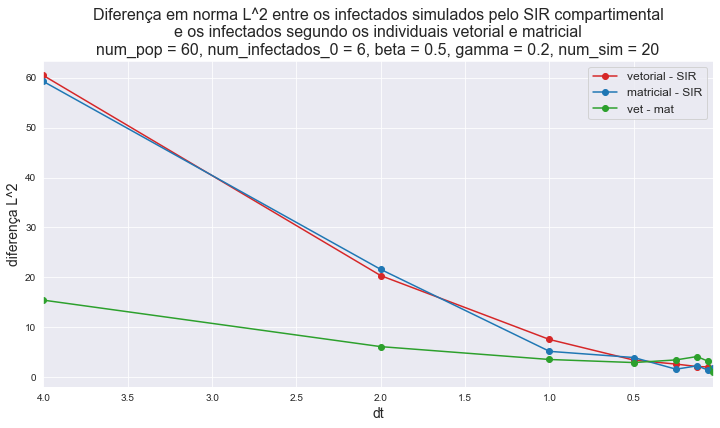

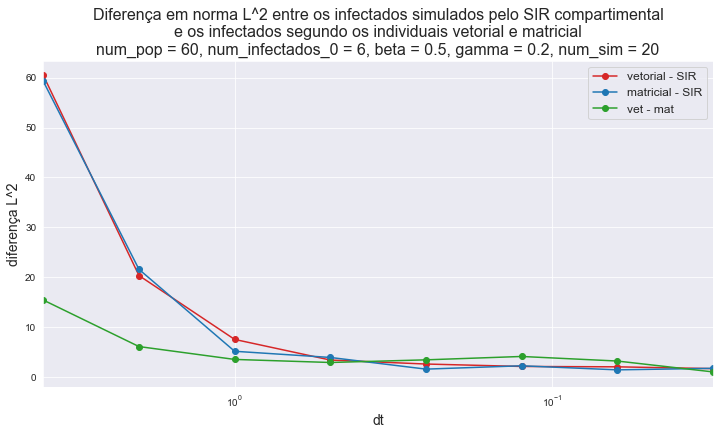

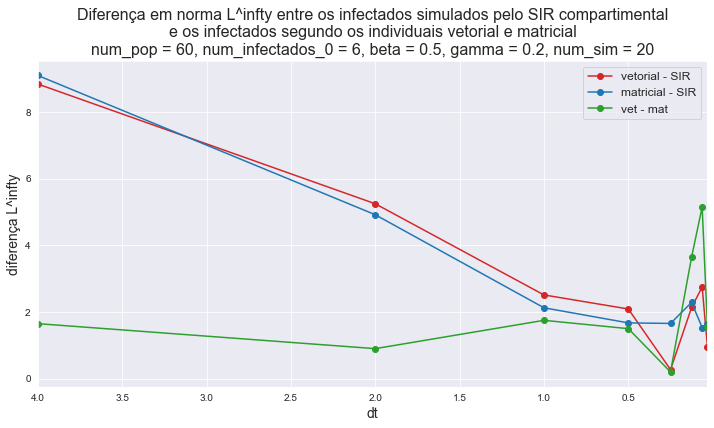

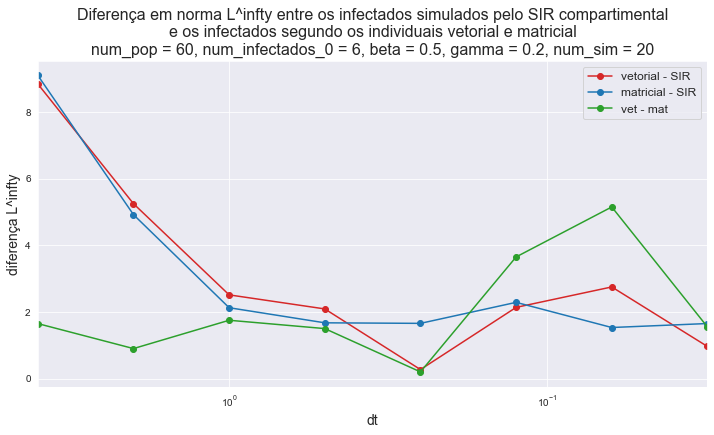

In [10]:
exibe_convergencia(dt_lista, num_pop, num_infectados_0, beta, gamma, num_sim,
                   l_2_comp_20, l_2_comp_mat, l_2_dif, norma = 'L^2', xscale = 'linear')
exibe_convergencia(dt_lista, num_pop, num_infectados_0, beta, gamma, num_sim,
                   l_2_comp_20, l_2_comp_mat, l_2_dif, norma  = 'L^2', xscale = 'log')
exibe_convergencia(dt_lista, num_pop, num_infectados_0, beta, gamma, num_sim,
                   l_infty_comp, l_infty_comp_mat, l_infty_dif, norma  = 'L^infty', xscale = 'linear')
exibe_convergencia(dt_lista, num_pop, num_infectados_0, beta, gamma, num_sim,
                   l_infty_comp, l_infty_comp_mat, l_infty_dif, norma  = 'L^infty', xscale = 'log')

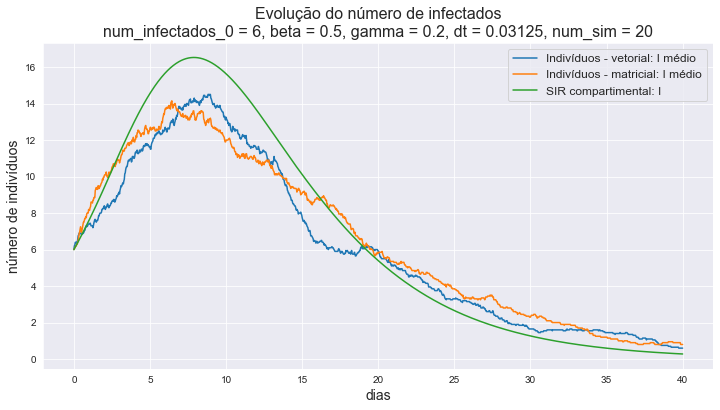

In [11]:
exibe_comparacao(X_comp, X_comp_mat, X_sir, num_infectados_0, beta, gamma, dt, num_sim)

## Diminuindo o número de simulações

In [12]:
%%time

num_sim = 5
dt_0 = 4 # primeiro passo
J = 8 # número de passos dt
t_0 = 0 # instante initial
T_max = 40 # instante final máximo

l_2_comp_5, l_2_comp_mat, l_infty_comp, l_infty_comp_mat, l_2_dif, l_infty_dif, \
    dt_lista, X_comp, X_comp_mat, X_sir, dt \
    = calcula_convergencia(num_sim, t_0, dt_0, T_max, J)

8 simulações com dt decrescente:
Valores de dt: [4.0, 2.0, 1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125]

Calculando soluções e diferenças para dt = 4.0...
Norma L^2 entre X_comp.I_medio e X_sir.I: 57.684835970624796
Norma L^2 entre X_comp_mat.I_medio e X_sir.I: 73.78203439433781
Norma L^2 entre X_comp.I_medio e X_comp_mat.I_medio: 21.850400453996258
Norma L^infty entre X_comp.I_medio e X_sir.I: 9.34824302972666
Norma L^infty entre X_comp_mat.I_medio e X_sir.I: 12.34824302972666
Norma L^infty entre X_comp.I_medio e X_comp_mat.I_medio: 1.5999999999999996

Calculando soluções e diferenças para dt = 2.0...
Norma L^2 entre X_comp.I_medio e X_sir.I: 13.986514301149208
Norma L^2 entre X_comp_mat.I_medio e X_sir.I: 28.396270906066682
Norma L^2 entre X_comp.I_medio e X_comp_mat.I_medio: 18.378248012256233
Norma L^infty entre X_comp.I_medio e X_sir.I: 3.5912138239765756
Norma L^infty entre X_comp_mat.I_medio e X_sir.I: 7.331355032428693
Norma L^infty entre X_comp.I_medio e X_comp_mat.I_medio: 3.79999

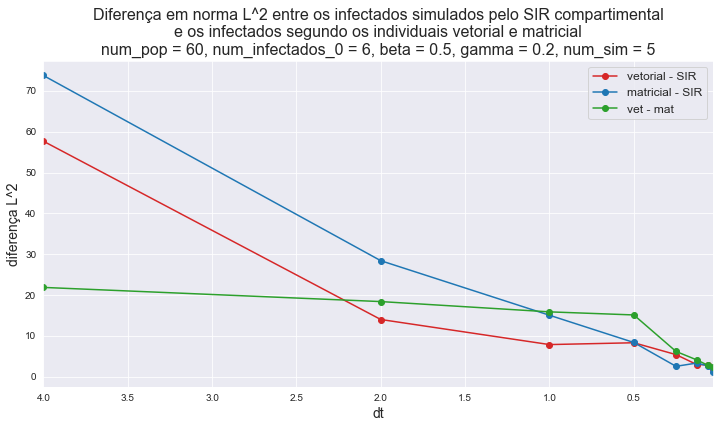

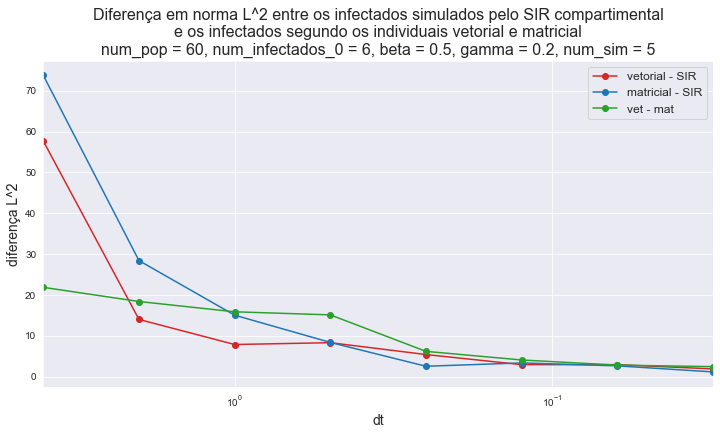

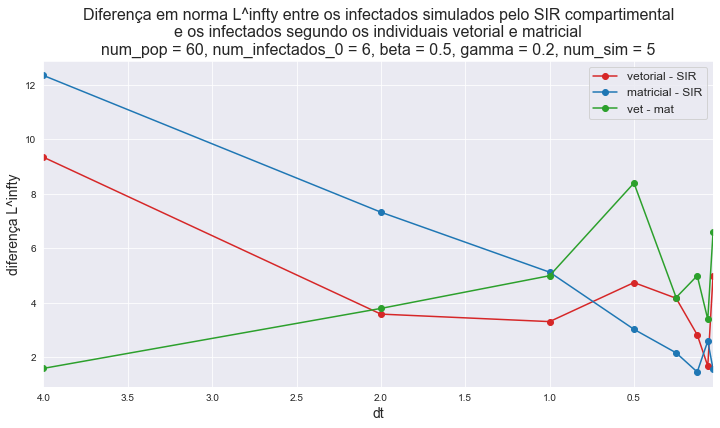

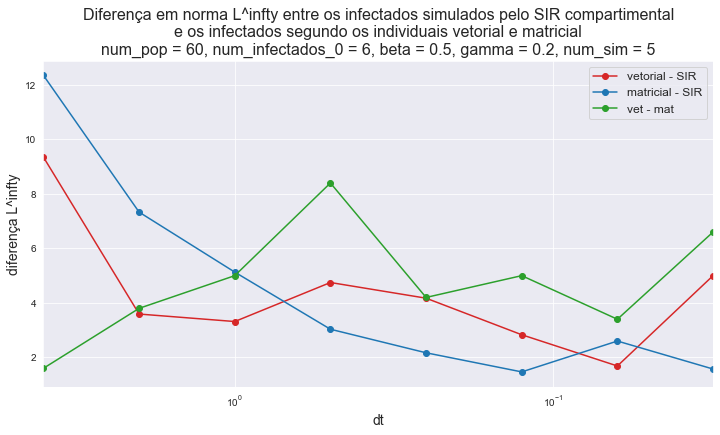

In [13]:
exibe_convergencia(dt_lista, num_pop, num_infectados_0, beta, gamma, num_sim,
                   l_2_comp_5, l_2_comp_mat, l_2_dif, norma = 'L^2', xscale = 'linear')
exibe_convergencia(dt_lista, num_pop, num_infectados_0, beta, gamma, num_sim,
                   l_2_comp_5, l_2_comp_mat, l_2_dif, norma  = 'L^2', xscale = 'log')
exibe_convergencia(dt_lista, num_pop, num_infectados_0, beta, gamma, num_sim,
                   l_infty_comp, l_infty_comp_mat, l_infty_dif, norma  = 'L^infty', xscale = 'linear')
exibe_convergencia(dt_lista, num_pop, num_infectados_0, beta, gamma, num_sim,
                   l_infty_comp, l_infty_comp_mat, l_infty_dif, norma  = 'L^infty', xscale = 'log')

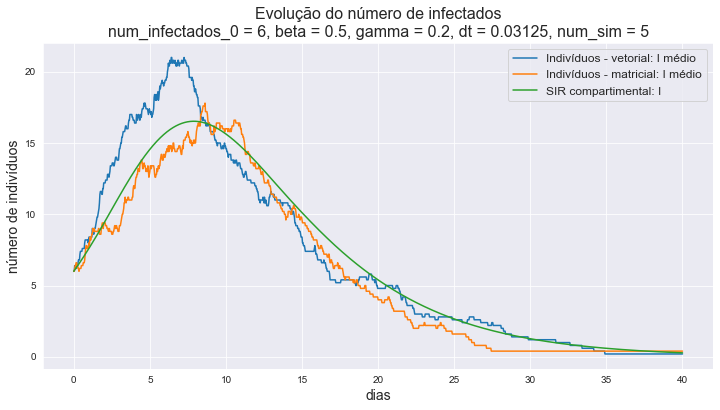

In [14]:
exibe_comparacao(X_comp, X_comp_mat, X_sir, num_infectados_0, beta, gamma, dt, num_sim)

## Aumentando o número de simulações

In [15]:
%%time

num_sim = 40
dt_0 = 4 # primeiro passo
J = 8 # número de passos dt
t_0 = 0 # instante initial
T_max = 40 # instante final máximo

l_2_comp_40, l_2_comp_mat, l_infty_comp, l_infty_comp_mat, l_2_dif, l_infty_dif, \
    dt_lista, X_comp, X_comp_mat, X_sir, dt \
    = calcula_convergencia(num_sim, t_0, dt_0, T_max, J)

8 simulações com dt decrescente:
Valores de dt: [4.0, 2.0, 1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125]

Calculando soluções e diferenças para dt = 4.0...
Norma L^2 entre X_comp.I_medio e X_sir.I: 66.32183577790161
Norma L^2 entre X_comp_mat.I_medio e X_sir.I: 57.77121664427191
Norma L^2 entre X_comp.I_medio e X_comp_mat.I_medio: 15.91665794066079
Norma L^infty entre X_comp.I_medio e X_sir.I: 10.648243029726661
Norma L^infty entre X_comp_mat.I_medio e X_sir.I: 8.266213823976575
Norma L^infty entre X_comp.I_medio e X_comp_mat.I_medio: 2.5

Calculando soluções e diferenças para dt = 2.0...
Norma L^2 entre X_comp.I_medio e X_sir.I: 22.390908613335238
Norma L^2 entre X_comp_mat.I_medio e X_sir.I: 23.73799243139674
Norma L^2 entre X_comp.I_medio e X_comp_mat.I_medio: 5.0867474873439535
Norma L^infty entre X_comp.I_medio e X_sir.I: 5.198243029726662
Norma L^infty entre X_comp_mat.I_medio e X_sir.I: 5.148243029726661
Norma L^infty entre X_comp.I_medio e X_comp_mat.I_medio: 1.1750000000000007

Calc

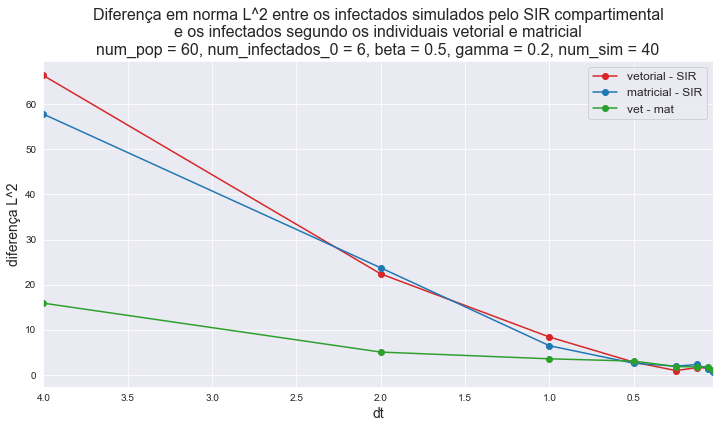

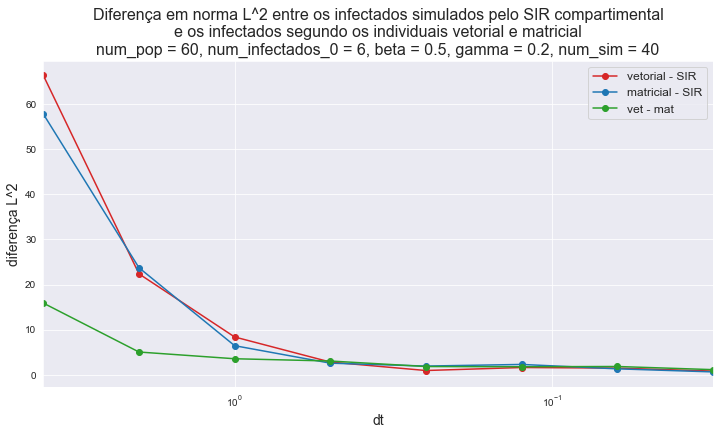

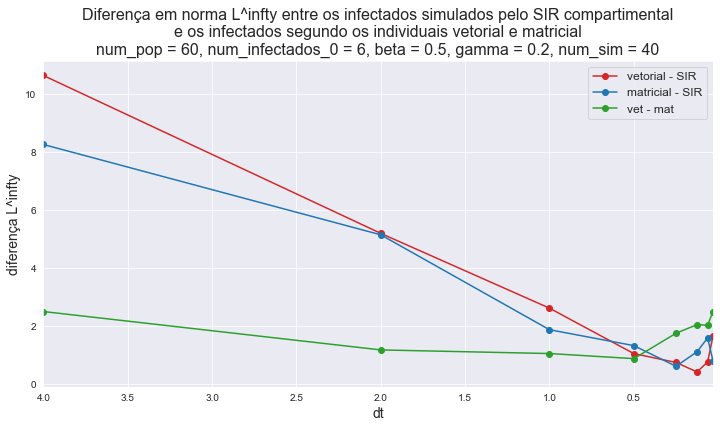

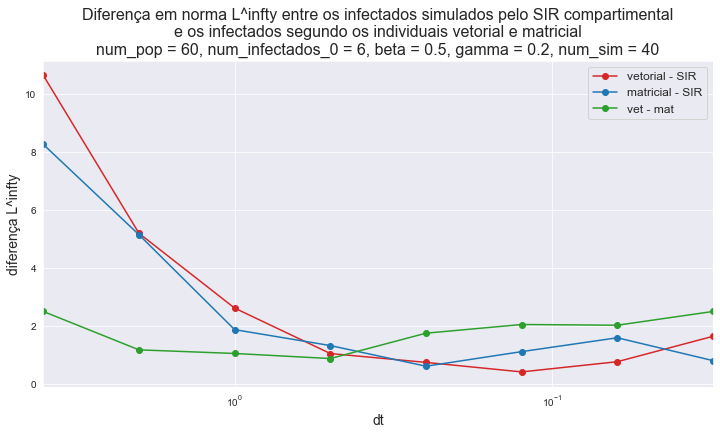

In [16]:
exibe_convergencia(dt_lista, num_pop, num_infectados_0, beta, gamma, num_sim,
                   l_2_comp_40, l_2_comp_mat, l_2_dif, norma = 'L^2', xscale = 'linear')
exibe_convergencia(dt_lista, num_pop, num_infectados_0, beta, gamma, num_sim,
                   l_2_comp_40, l_2_comp_mat, l_2_dif, norma  = 'L^2', xscale = 'log')
exibe_convergencia(dt_lista, num_pop, num_infectados_0, beta, gamma, num_sim,
                   l_infty_comp, l_infty_comp_mat, l_infty_dif, norma  = 'L^infty', xscale = 'linear')
exibe_convergencia(dt_lista, num_pop, num_infectados_0, beta, gamma, num_sim,
                   l_infty_comp, l_infty_comp_mat, l_infty_dif, norma  = 'L^infty', xscale = 'log')

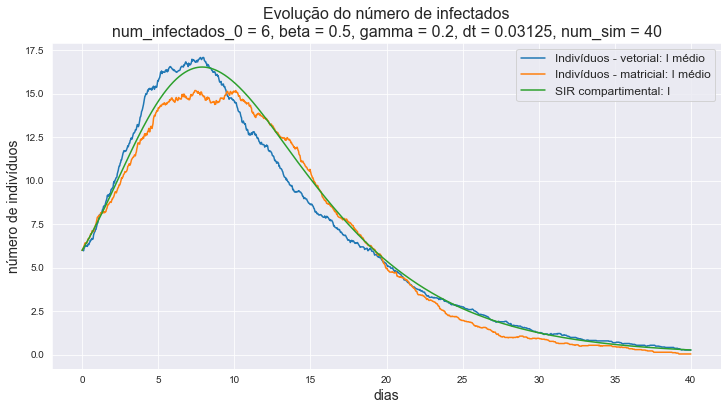

In [17]:
exibe_comparacao(X_comp, X_comp_mat, X_sir, num_infectados_0, beta, gamma, dt, num_sim)

### Comparação em relação à variação no número de simulações

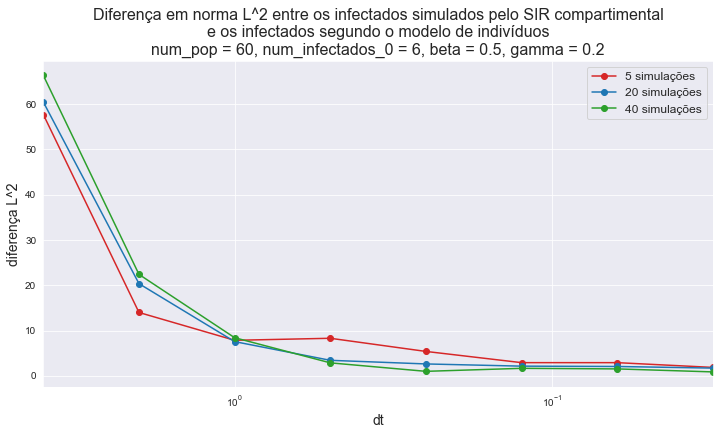

In [18]:
plt.figure(figsize=(12,6))

plt.plot(dt_lista, l_2_comp_5, 'o-', color='tab:red', label='5 simulações')
plt.plot(dt_lista, l_2_comp_20, 'o-', color='tab:blue', label='20 simulações')
plt.plot(dt_lista, l_2_comp_40, 'o-', color='tab:green', label='40 simulações')

plt.xscale('log')
plt.xlim([dt_lista[0], dt_lista[-1]])
plt.legend(loc='best', fontsize=12)

plt.xlabel('dt', fontsize=14)
plt.ylabel(f'diferença L^2', fontsize=14)
plt.title(f'Diferença em norma L^2 entre os infectados simulados pelo SIR compartimental'
          + '\ne os infectados segundo o modelo de indivíduos'
          + f'\nnum_pop = {num_pop}, num_infectados_0 = {num_infectados_0}, beta = {beta}, '
          + f'gamma = {gamma}',
          fontsize = 16)

plt.show()

## Aumentando a população

In [19]:
num_pop = 100
num_infectados_0 = 10
beta = 0.5
gamma = 0.2

pop_sir_0 = [num_pop-num_infectados_0, num_infectados_0, 0]

rede_completa = episiming.cenarios.RedeCompleta(num_pop, num_infectados_0, beta, gamma)

In [20]:
%%time

num_sim = 20
dt_0 = 4 # primeiro passo
J = 8 # número de passos dt
t_0 = 0 # instante initial
T_max = 40 # instante final máximo

l_2_comp, l_2_comp_mat, l_infty_comp, l_infty_comp_mat, l_2_dif, l_infty_dif, \
    dt_lista, X_comp, X_comp_mat, X_sir, dt \
    = calcula_convergencia(num_sim, t_0, dt_0, T_max, J)

8 simulações com dt decrescente:
Valores de dt: [4.0, 2.0, 1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125]

Calculando soluções e diferenças para dt = 4.0...
Norma L^2 entre X_comp.I_medio e X_sir.I: 108.57048986492967
Norma L^2 entre X_comp_mat.I_medio e X_sir.I: 102.51242108636268
Norma L^2 entre X_comp.I_medio e X_comp_mat.I_medio: 16.349923547221866
Norma L^infty entre X_comp.I_medio e X_sir.I: 17.297072341392514
Norma L^infty entre X_comp_mat.I_medio e X_sir.I: 15.535341555902273
Norma L^infty entre X_comp.I_medio e X_comp_mat.I_medio: 2.5

Calculando soluções e diferenças para dt = 2.0...
Norma L^2 entre X_comp.I_medio e X_sir.I: 35.306299917498315
Norma L^2 entre X_comp_mat.I_medio e X_sir.I: 44.653028195991105
Norma L^2 entre X_comp.I_medio e X_comp_mat.I_medio: 11.332254850646452
Norma L^infty entre X_comp.I_medio e X_sir.I: 8.347072341392519
Norma L^infty entre X_comp_mat.I_medio e X_sir.I: 10.34850474016968
Norma L^infty entre X_comp.I_medio e X_comp_mat.I_medio: 0.10000000000000053

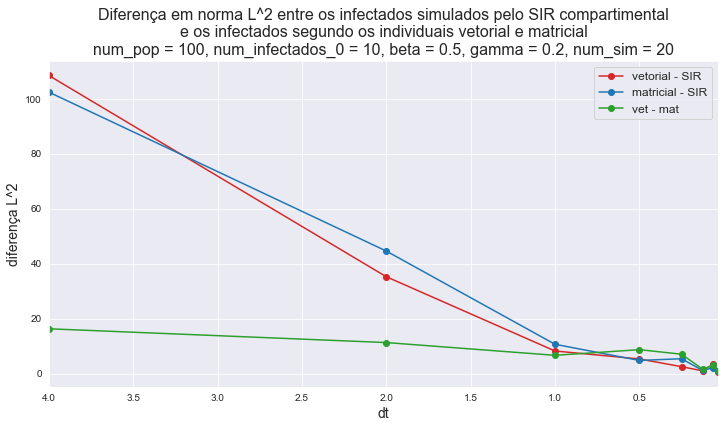

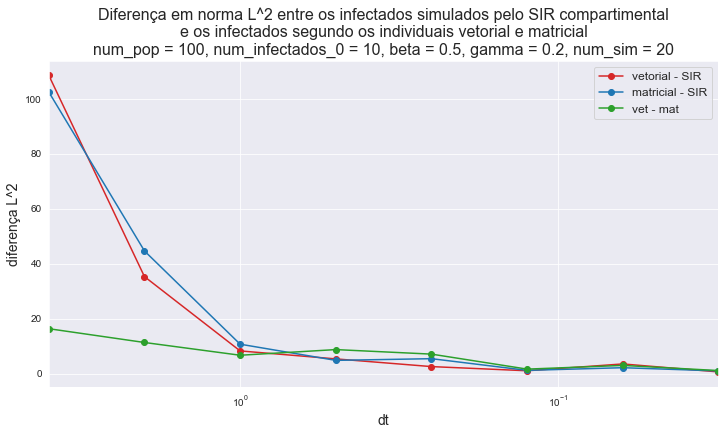

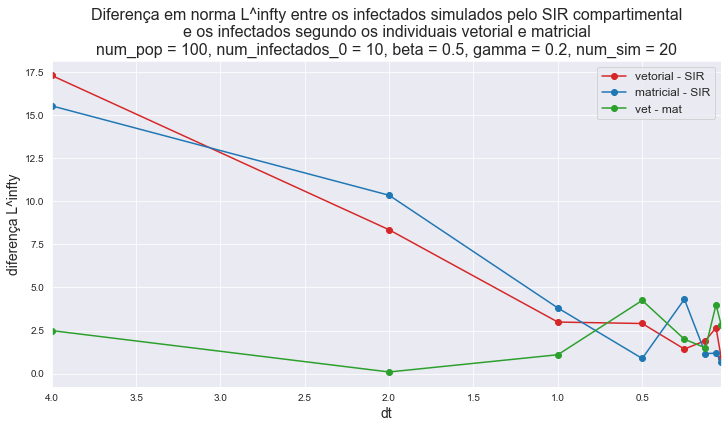

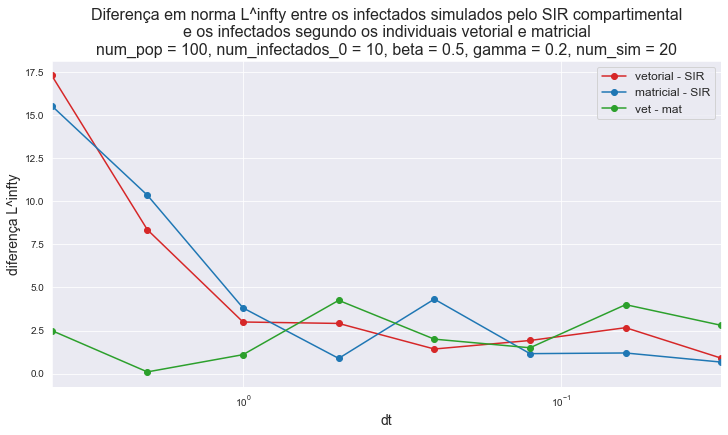

In [21]:
exibe_convergencia(dt_lista, num_pop, num_infectados_0, beta, gamma, num_sim,
                   l_2_comp, l_2_comp_mat, l_2_dif, norma = 'L^2', xscale = 'linear')
exibe_convergencia(dt_lista, num_pop, num_infectados_0, beta, gamma, num_sim,
                   l_2_comp, l_2_comp_mat, l_2_dif, norma  = 'L^2', xscale = 'log')
exibe_convergencia(dt_lista, num_pop, num_infectados_0, beta, gamma, num_sim,
                   l_infty_comp, l_infty_comp_mat, l_infty_dif, norma  = 'L^infty', xscale = 'linear')
exibe_convergencia(dt_lista, num_pop, num_infectados_0, beta, gamma, num_sim,
                   l_infty_comp, l_infty_comp_mat, l_infty_dif, norma  = 'L^infty', xscale = 'log')

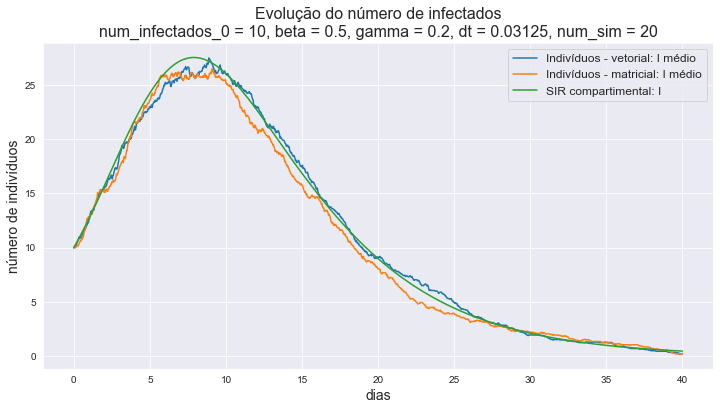

In [22]:
exibe_comparacao(X_comp, X_comp_mat, X_sir, num_infectados_0, beta, gamma, dt, num_sim)

## Reduzindo o número de infectados iniciais

In [23]:
num_pop = 100
num_infectados_0 = 4
beta = 0.5
gamma = 0.2

pop_sir_0 = [num_pop-num_infectados_0, num_infectados_0, 0]

rede_completa = episiming.cenarios.RedeCompleta(num_pop, num_infectados_0, beta, gamma)

In [24]:
%%time

num_sim = 20
dt_0 = 4 # primeiro passo
J = 7 # número de passos dt
t_0 = 0 # instante initial
T_max = 40 # instante final máximo

l_2_comp, l_2_comp_mat, l_infty_comp, l_infty_comp_mat, l_2_dif, l_infty_dif, \
    dt_lista, X_comp, X_comp_mat, X_sir, dt \
    = calcula_convergencia(num_sim, t_0, dt_0, T_max, J)

7 simulações com dt decrescente:
Valores de dt: [4.0, 2.0, 1.0, 0.5, 0.25, 0.125, 0.0625]

Calculando soluções e diferenças para dt = 4.0...
Norma L^2 entre X_comp.I_medio e X_sir.I: 109.4608228600231
Norma L^2 entre X_comp_mat.I_medio e X_sir.I: 112.77184320706617
Norma L^2 entre X_comp.I_medio e X_comp_mat.I_medio: 9.604165762834386
Norma L^infty entre X_comp.I_medio e X_sir.I: 16.34759239303324
Norma L^infty entre X_comp_mat.I_medio e X_sir.I: 17.29759239303324
Norma L^infty entre X_comp.I_medio e X_comp_mat.I_medio: 0.75

Calculando soluções e diferenças para dt = 2.0...
Norma L^2 entre X_comp.I_medio e X_sir.I: 37.22939614320178
Norma L^2 entre X_comp_mat.I_medio e X_sir.I: 40.496683929023014
Norma L^2 entre X_comp.I_medio e X_comp_mat.I_medio: 13.446932735757995
Norma L^infty entre X_comp.I_medio e X_sir.I: 8.320393614239077
Norma L^infty entre X_comp_mat.I_medio e X_sir.I: 9.520393614239076
Norma L^infty entre X_comp.I_medio e X_comp_mat.I_medio: 1.0999999999999979

Calculando s

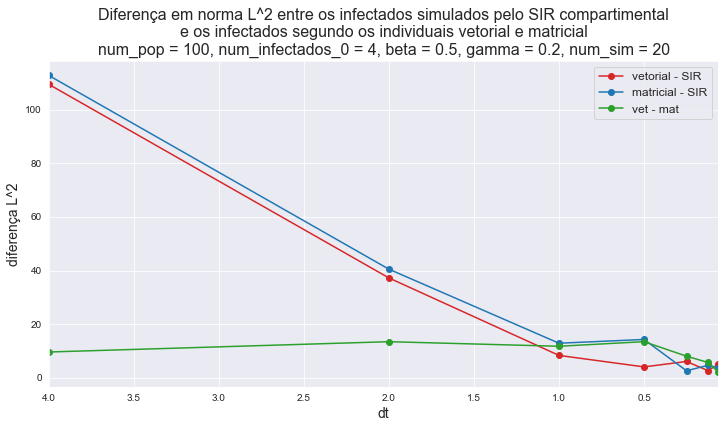

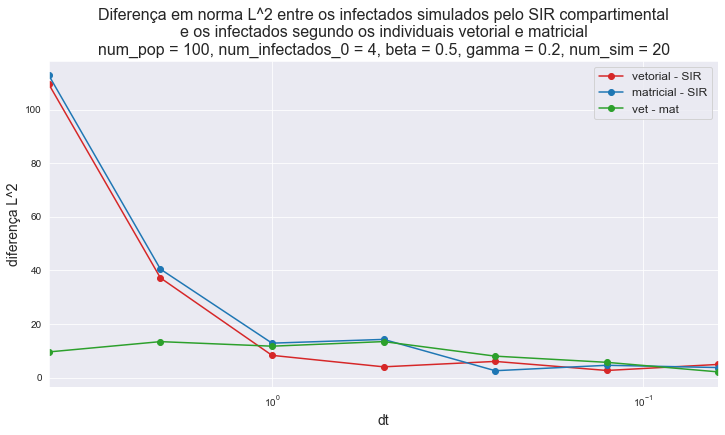

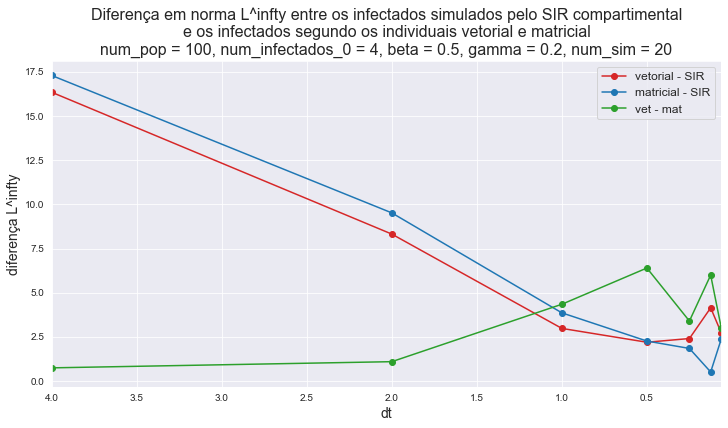

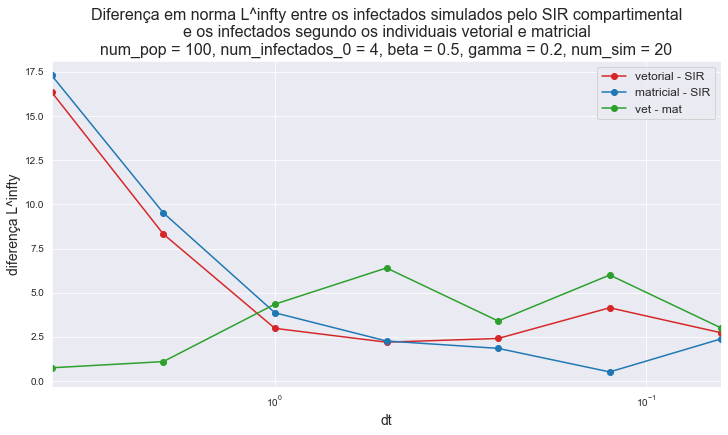

In [25]:
exibe_convergencia(dt_lista, num_pop, num_infectados_0, beta, gamma, num_sim,
                   l_2_comp, l_2_comp_mat, l_2_dif, norma = 'L^2', xscale = 'linear')
exibe_convergencia(dt_lista, num_pop, num_infectados_0, beta, gamma, num_sim,
                   l_2_comp, l_2_comp_mat, l_2_dif, norma  = 'L^2', xscale = 'log')
exibe_convergencia(dt_lista, num_pop, num_infectados_0, beta, gamma, num_sim,
                   l_infty_comp, l_infty_comp_mat, l_infty_dif, norma  = 'L^infty', xscale = 'linear')
exibe_convergencia(dt_lista, num_pop, num_infectados_0, beta, gamma, num_sim,
                   l_infty_comp, l_infty_comp_mat, l_infty_dif, norma  = 'L^infty', xscale = 'log')

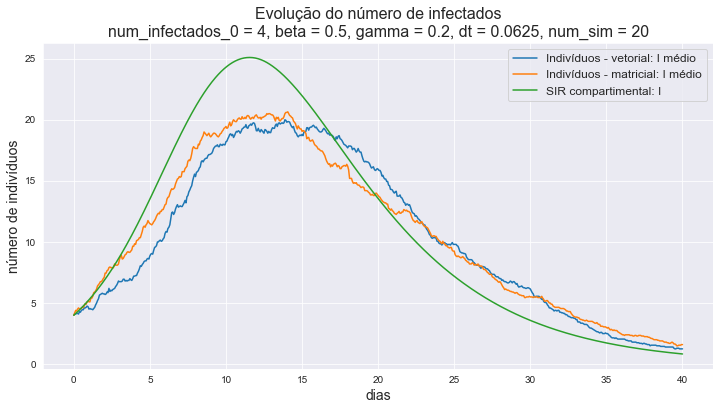

In [26]:
exibe_comparacao(X_comp, X_comp_mat, X_sir, num_infectados_0, beta, gamma, dt, num_sim)

## Análise

### EDO determinística

- Considere a seguinte EDO com $\beta$, $N$ constantes e $I=I(t)$:

$$ \frac{\mathrm{d} S}{\mathrm{d} t} = -\frac{\beta}{N} S I.
$$

- Solução exata em um intervalo $[t_0, t_0 + \Delta t]$:

$$ S(t) = S(t_0)e^{\displaystyle -\frac{\beta}{N}\int_{t_0}^{t}I(s)\;\mathrm{d}s}.
$$

- Diferença em $S(t)$:

$$ \Delta S = S(t_0+\Delta t) - S(t_0) = S(t_0)\left(e^{\displaystyle -\frac{\beta}{N}\int_{t_0}^{t_0+\Delta t}I(s)\;\mathrm{d}s} - 1\right).
$$

- Isso nos dá os **novos infectados**:

$$ \Delta I = - \Delta S = S(t_0)\left(1 - e^{\displaystyle -\frac{\beta}{N}\int_{t_0}^{t_0+\Delta t}I(s)\;\mathrm{d}s}\right). \qquad \qquad (1)
$$


### Aproximação da EDO determinística

Podemos considerar quatro aproximações distintas para a solução exata. A primeira é a clássica aproximação de Euler. A terceira está diretamente ligada ao **modelo de indivíduos** (versão vetorial).

- Aproximação de **Euler:**

$$ S(t_0+\Delta t) = S(t_0) - \frac{\beta}{N}I(t_0)S(t_0)\Delta t + \mathcal{O}(\Delta t^2),
$$

o que nos leva a 

$$ \Delta I = S(t_0)\frac{\beta}{N}I(t_0) \Delta + \mathcal{O}(\Delta t^2).
$$

- Aproximação **expandindo a exponencial**

$$ e^{\displaystyle -\frac{\beta}{N}\int_{t_0}^{t_0+\Delta t}I(s)\;\mathrm{d}s} = 1 - \frac{\beta}{N}\int_{t_0}^{t_0+\Delta t}I(s)\;\mathrm{d}s + \mathcal{O}(\Delta t^2),
$$

o que nos leva a 

$$ \Delta I = S(t_0)\frac{\beta}{N}\int_{t_0}^{t_0+\Delta t}I(s)\;\mathrm{d}s + \mathcal{O}(\Delta t^2).
$$

- Aproximação **expandindo a integral** dentro da exponencial. Como

$$ \int_{t_0}^{t_0+\Delta t}I(s)\;\mathrm{d}s = I(t_0)\Delta t + \int_{t_0}^{t_0+\Delta t}(I(s)-I(t_0))\;\mathrm{d}s = I(t_0)\Delta t + \mathcal{O}(\Delta t^2),
$$

temos 

$$ \Delta I = S(t_0)\left(1 - e^{\displaystyle -\frac{\beta}{N} I(t_0) \Delta t} \right)  + \mathcal{O}(\Delta t^2).
$$

- Aproximação **expandindo a exponencial e a integral**:

$$ \Delta I = S(t_0)\frac{\beta}{N}I(t_0)\Delta t + \mathcal{o}(\Delta t),
$$



### Aproximação estocástica pelo método matricial

- No **método matricial**, a probabilidade de um infectado $k$ contagiar um suscetível $i$, do instante $t_0$ para o $t_0+\Delta t$, é

$$ \left(1 - e^{\displaystyle -\frac{\beta}{N}\Delta t}\right).
$$

- A probabilidade de um suscetível $i$ ser infectado pelo conjunto de infectados é

$$ I(t_0)\left(1 - e^{\displaystyle -\frac{\beta}{N}\Delta t}\right).
$$

- Juntando todos os suscetíveis, obtemos o **incremento do número de infectados**:

$$ \Delta I = S(t_0)I(t_0)\left(1 - e^{\displaystyle -\frac{\beta}{N}\Delta t}\right). \qquad \qquad \mathrm{(2)}
$$

- Aproximando a exponencial:

$$ \Delta I = \frac{\beta}{N}S(t_0)I(t_0)\Delta t + \mathcal{O}(\Delta t^2)
$$

- Mas é importante ressaltar que, pela natureza estocástica do modelo, a relação (2) acima não é tão direta assim, valendo em um sentido "médio".

### Aproximação estocástica pelo método vetorial

- No **método vetorial**, calculamos a **força de infecção** agindo em um suscetível $i$ como sendo

$$ \lambda_i = \frac{\beta}{N}I(t_0).
$$

- A probabilidade de um indivíduo suscetível $i$ ser infectado pelo conjunto de infectados é

$$ 1 - e^{-\lambda_i \Delta t} = 1 - e^{ \displaystyle - \frac{\beta}{N}I(t_0)\Delta t}.
$$

- Juntando todos os suscetíveis, obtemos o **incremento do número de infectados:**

$$ \Delta I = S(t_0)\left(1 - e^{ \displaystyle - \frac{\beta}{N}I(t_0)\Delta t}\right). \qquad \qquad \mathrm{(1)}. \qquad \qquad \mathrm{(3)}
$$

- Expandindo:

$$ \Delta I = \frac{\beta}{N}S(t_0)I(t_0)\Delta t + \mathcal{O}(\Delta t^2).
$$

- Novamente, devido à natureza estocástica do modelo, a relação (3) acima não é tão direta assim, valendo em um sentido "médio".

### Diferença entre os métodos

- Temos

$$ \Delta I_{\textrm{matricial}} = S(t_0)I(t_0)\left(1 - e^{\displaystyle -\frac{\beta}{N}\Delta t}\right) \qquad \Delta I_{\textrm{vetorial}} = S(t_0)\left(1 - e^{ \displaystyle - \frac{\beta}{N}I(t_0)\Delta t}\right).
$$

- Logo

$$ \Delta I_{\textrm{matricial}} - \Delta I_{\textrm{vetorial}} = S(t_0) I(t_0)(1 - I(t_0))\frac{\beta^2}{N^2}\Delta t^2 + \mathcal{O}(\Delta t^3).
$$

## Trabalhos

### Parte 1

Considere o seguinte sistema simplificado de equações diferenciais, em um intervalo de tempo $[t_0, T]$:

$$ \begin{cases}
  S' = - \frac{\beta}{N}S I, \\ I' = \frac{\beta}{N} S I,
\end{cases}
$$

onde $\beta>0$, $N\in \mathbb{R}$ são constantes. Suponha que as condições iniciais $I(t_0)$ e $S(t_0)$ satisfaçam

$$ S(t_0) \geq 0, \;I(t_0) \geq 0, \;S(t_0) + I(t_0) = N.
$$

1. Mostre que
$$ S(t) = S(t') + S(t')\left(1 - e^{\displaystyle -\frac{\beta}{N}\int_{t'}^t I(s)\;\mathrm{d}s}\right), \quad \forall t', t, \;t_0 \leq t', t \leq T.
$$
e
$$ I(t) = I(t') + S(t')\left(1 - e^{\displaystyle -\frac{\beta}{N}\int_{t'}^t I(s)\;\mathrm{d}s}\right), \quad \forall t', t, \;t_0 \leq t', t \leq T, \qquad \qquad (1)
$$

1. Mostre que
$$ S(t) \geq 0, \;I(t) \geq 0, \;S(t) + I(t) = N, \qquad \forall t, \; t_0\leq t \leq T.
$$

### Parte 2

Considere, agora, uma família de aproximações $(I^{h}, S^{h})_h$ dadas recursivamente por

$$ \begin{cases}
  S^h_l = N - I^h_l, \\
  I^h_{l+1} = I^h_l + S^h_l\left(1 - e^{ \displaystyle - \frac{\beta}{N}I_lh}\right), \quad l = 0, \ldots, L-1,
  \end{cases}
$$

onde $L\in \mathbb{N}$ e com $h = h_L = T/L$ fazendo o papel de $\Delta t$.

Observe que, pelas relações $S(t) = N - I(t)$ e $S^h_l = N - I^h_l$, basta estabelecermos a convergência de $I^h$ para $I$, nos pontos $t_l = t_0 + lh$, $l=0, \ldots, L$ de cada malha.

Denotamos por $\Lambda^h$ a família de operadores

$$ \Lambda_h(I) = \frac{S}{h}\left(1 - e^{ \displaystyle - \frac{\beta}{N}Ih}\right),
$$

para $I\in \mathbb{R}$, com $S=N-I$, de forma que

$$ I^h_{l+1} = I^h_l + h \Lambda_h(I^h_l), \qquad l = 0, \ldots, L-1.
$$

Por fim, seja $\tau_l^h$ o **erro de truncamento local** dado por

$$ \tau_{l+1}^h = \frac{I(t_{l+1}) - I(t_l)}{h} - \Lambda_h(I(t_l)).
$$

3. Mostre que
$$ 0 \leq \Lambda_h(I)\leq \beta I, \qquad \forall I\geq 0,
$$
e obtenha a seguinte **limitação uniforme** para as soluções:
$$ 0 \leq I_l^h \leq I_0^h e^{\beta lh}, \qquad \forall l=0, \ldots, L.
$$

3. Mostre que, para quaisquer $I_a, I_b\geq 0$,
$$ |\Lambda_h(I_a) - \Lambda_h(I_b)| \leq 2\beta |I_a - I_b|
$$
e obtenha a **estabilidade** do método:
$$ |I^h_{a, l} - I^h_{b, l}| \leq |I_{a,0}-I_{b,0}|e^{2\beta lh}, \qquad \forall l=0, \ldots, L.
$$

3. Mostre que o erro de truncamento satisfaz
$$ |\tau_{l+1}^h| \leq \beta \max_{s\in [0,T]}|I'(s)| \frac{h}{2}.
$$
Conclua, com isso, que a aproximação é **consistente** com a equação diferencial e é de **ordem 1**.

3. Com base nas estimativas de estabilidade e consistência acima, mostre a **convergência** da aproximação, no intervalo $[0,T]$, quando $L \rightarrow \infty$. Mais precisamente, mostre que
$$ |I(t_l) - I_l^h| \leq \max_{s\in [0,T]}|I'(s)|\left(e^{2\beta lh} - 1\right)\frac{h}{4} + e^{2\beta l h}|I(t_0) - I_0^h|,
$$
de modo que $\max_{l=0,\ldots,L} |I(t_l)- I_l^h| \rightarrow 0$, quando $L\rightarrow \infty$.

3. Numa situação inicial de epidemia, temos $I'(0)> 0$. Supondo $I_0^h=I(0)$, mostre que 
$$ I(h)> I_1^h.
$$

### Parte 3

Considere, agora, a família de operadores

$$ \tilde\Lambda_h(I) = \frac{SI}{h}\left(1 - e^{ \displaystyle - \frac{\beta}{N}h}\right)
$$

e a aproximação associada

$$ \tilde I^h_{l+1} = \tilde I^h_l + h \Lambda_h(\tilde I^h_l), \qquad l = 0, \ldots, L-1.
$$

8. Mostre que existe um único $I^*>0$ tal que 
$$ I^*\left(1 - e^{\displaystyle - \frac{\beta}{N}h}\right) = 1 - e^{\displaystyle - \frac{\beta}{N}h}.
$$

8. Mostre que
$$ \tilde\Lambda_h(I_0) < \Lambda_h(I_0), \quad \textrm{para } 0 \leq I_0 \leq I^*
$$
e que
$$ \tilde\Lambda_h(I_0) > \Lambda_h(I_0), \quad \textrm{para } I_0\geq I^*.
$$

8. Obtenha, numericamente, aproximações para o valor de $I^*$ nos exemplos tratados nesta aula.

As aproximações acima não determinam o comportamento das médias dos métodos estocásticos, mas as relações 7 e 9, em particular, podem ser vistas como indícios corroborando as relações similares vistas, em geral, para essas médias.

<!--NAVIGATOR-->

---
[<- Modelos individuais - comparação entre as implementações matricial e vetorial](13.00.Aula-Modelos_individuais_comparacao_matricial_vetorial.ipynb) | [Página Inicial](00.00-Pagina_Inicial.ipynb) 